<span style="font-size:3.5em;">Predicting Coupon Usage </span>

# Bussiness Problems 

ABC family of companies is looking to put a new product they tested it in some new locations and though it is a great product people are not buying it. ABC family of companies want to put out coupons for the product to generate buzz behind the product, but they only want to send coupons customers who are likely to use the coupon.

# Data Cleaning 

## Import

All imports will be located below. 

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Draws graphes 
import seaborn as sns #Draws intuitive graphs 
import graphviz
np.random.seed(0)
#splits data
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score
#Creates accuracy score, confustion matris, and classification repor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#creates decision tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler
#creaters Bagging Classifier and Random Forest
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier  
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
import warnings #Removes warnings


warnings.filterwarnings("ignore")
%matplotlib inline

In [264]:
data = pd.read_csv(r"C:\Users\laure\Flatiron\Phase3-project\python_upload.csv", sep=';')
data.head()

id  campaign_id  coupon_id  redemption_status  customer_id age_range  \
0   1           13         27                  0         1053     46-55   
1   2           13        116                  0           48     36-45   
2   6            9        635                  0          205     46-55   
3   7           13        644                  0            0       NaN   
4   9            8       1017                  0         1489     46-55   

  marital_status  rented  family_size no_of_children  income_bracket  
0            NaN       0            1            NaN               5  
1        Married       0            2            NaN               3  
2        Married       0            2            NaN               7  
3            NaN       0            0            NaN               0  
4        Married       0            2            NaN               3

In [265]:
data.describe()

id   campaign_id     coupon_id  redemption_status  \
count   78369.000000  78369.000000  78369.000000       78369.000000   
mean    64347.975449     13.974441    566.363243           0.009302   
std     37126.440855      8.019215    329.966054           0.095999   
min         1.000000      1.000000      1.000000           0.000000   
25%     32260.000000      8.000000    280.000000           0.000000   
50%     64318.000000     13.000000    597.000000           0.000000   
75%     96577.000000     13.000000    857.000000           0.000000   
max    128595.000000     30.000000   1115.000000           1.000000   

        customer_id        rented   family_size  income_bracket  
count  78369.000000  78369.000000  78369.000000    78369.000000  
mean     394.739591      0.029642      1.004798        2.418801  
std      507.905423      0.169598      1.177557        2.899768  
min        0.000000      0.000000      0.000000        0.000000  
25%        0.000000      0.000000      0.000000        0.000000  
50%       17.000000      0.000000      1.000000        1.000000  
75%      775.000000      0.000000      2.000000        5.000000  
max     1581.000000      1.000000      4.000000       12.000000

In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 78369 non-null  int64 
 1   campaign_id        78369 non-null  int64 
 2   coupon_id          78369 non-null  int64 
 3   redemption_status  78369 non-null  int64 
 4   customer_id        78369 non-null  int64 
 5   age_range          39906 non-null  object
 6   marital_status     22023 non-null  object
 7   rented             78369 non-null  int64 
 8   family_size        78369 non-null  int64 
 9   no_of_children     10301 non-null  object
 10  income_bracket     78369 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 6.6+ MB


In [267]:
df = data 

## Fill in NULL values 

In [268]:
print(str(round(((((df['age_range'].isna().sum()))/len(df))*100),2)) 
+ '% Null in age_range')
print(str(round(((((df['marital_status'].isna().sum()))/len(df))*100),2)) 
+ '% Null in marital_status')
print(str(round(((((df['no_of_children'].isna().sum()))/len(df))*100),2)) 
+ '% Null in no_of_children')

49.08% Null in age_range
71.9% Null in marital_status
86.86% Null in no_of_children


Need to fill in NULL values in:
* age_range
* marital_status
* no_of_children

In [269]:
df_columns = df.columns
for i in df_columns:
    print('\033[1m' + i.upper() + '\033[0m')
    print(df[[i]].value_counts(ascending=False))
    print('___________________________________________________')

ID
id    
128595    1
42866     1
42851     1
42855     1
42858     1
         ..
85769     1
85770     1
85774     1
85776     1
1         1
Length: 78369, dtype: int64
___________________________________________________
CAMPAIGN_ID
campaign_id
13             22606
8              22555
30              6467
26              6056
29              3895
9               3168
11              2782
12              2550
5               1827
10              1723
7               1584
4                972
2                768
28               476
3                408
27               324
1                143
6                 65
dtype: int64
___________________________________________________
COUPON_ID
coupon_id
705          570
470          447
691          405
468          366
1043         357
            ... 
832           12
835           12
836           12
837           12
724           12
Length: 866, dtype: int64
___________________________________________________
REDEMPTION_STATUS
redempti

Distrubution of income bracket as a percentage.

In [270]:
5.0               
#1
print('1:' + str(3279/39906))
#2                  
print('2:' + str(3737/39906))
#3                  
print('3:' + str(3486/39906))
#4                  
print('4:' + str(7983/39906))
#5                 
print('5:' + str(10205/39906))
#6                  
print('6:' + str(4465/39906))
#7                  
print('7:' + str(1713/39906))
#8                  
print('8:' + str(1783/39906))
#9                  
print('9:' + str(1818/39906))
#10                  
print('10:' + str(513/39906))
#11                  
print('11:' + str(234/39906))
#12                  
print('12:' + str(690/39906))


1:0.08216809502330477
2:0.09364506590487646
3:0.08735528491956097
4:0.2000451059990979
5:0.255725955996592
6:0.11188793665113016
7:0.04292587580814915
8:0.04467999799528893
9:0.04555705908885882
10:0.012855209742895805
11:0.005863779882724403
12:0.017290632987520673


In [271]:
df['income_bracket']=df['income_bracket'].replace(0, np.nan)

In [272]:
df['income_bracket'].isnull().sum()

38463

In [273]:
df['income_bracket'] = df['income_bracket'].fillna(pd.Series(np.random.choice([
    '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', 
    '9.0', '10.0', '11.0', '12.0'], 
    p=[.08, .09, .09, .20, .26, .11, .04, .04, .05, .01, .01, .02],
    size= len(df))))

Use single number to Represent age catorgory. <br/>
Use single number to represent material status (1,2,3) <br/>
Use single number to represent number of children 


<b> AGE_RANGE </b>
<br> 18-25 will be 1
<br> 26-35 will be 2
<br> 36-45 will be 3
<br> 46-55 will be 4
<br> 56-70 will be 5
<br> 70+ will be 6


In [274]:
df['age_range']=df['age_range'].replace({'18-25' : '1', '26-35' : '2', 
            '36-45' : '3', '46-55' : '4', '56-70' : '5', '70+' : '6'})
df['age_range']

0          4
1          3
2          4
3        NaN
4          4
        ... 
78364      6
78365      6
78366    NaN
78367    NaN
78368    NaN
Name: age_range, Length: 78369, dtype: object

In [275]:
df[['age_range']].isnull().sum()

age_range    38463
dtype: int64

Distribution of age as a percentage.

In [276]:
# 1 
print(2398/ 39906)
# 2
print(7203/ 39906)
# 3
print(9534/ 39906)
# 4
print(14094/ 39906)
# 5
print(3583/ 39906)
# 6
print(3094/ 39906)


0.06009121435373127
0.1804991730566832
0.23891144188843783
0.3531799729364005
0.08978599709316895
0.0775322006715782


In [277]:
df['age_range'] = df['age_range'].fillna(pd.Series(np.random.choice(['1', '2',
                '3', '4', '5', '6'], p=[.06, .18, .24, .35, .09, .08], 
                    size= len(df))))

<b> MARITAL_STATUS </b>
<br> Married will be 1
<br> Single will be 0
<br> Nan will be 2

In [278]:
df['marital_status']=df['marital_status'].replace({'Married': '1', 
                                                   'Single': '0'})
df['marital_status']

0        NaN
1          1
2          1
3        NaN
4          1
        ... 
78364      1
78365      1
78366    NaN
78367    NaN
78368    NaN
Name: marital_status, Length: 78369, dtype: object

In [279]:
#Convert NaN to 2 for marital_status
df['marital_status'].fillna(2, inplace=True)
df['marital_status']

0        2
1        1
2        1
3        2
4        1
        ..
78364    1
78365    1
78366    2
78367    2
78368    2
Name: marital_status, Length: 78369, dtype: object

In [280]:
df['age_range'] = df['age_range'].astype(str).astype(int)

In [281]:
df['marital_status'] = df['marital_status'].astype(str).astype(int)

In [282]:
df['income_bracket'] = df['income_bracket'].astype(str).astype(float)

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 78369 non-null  int64  
 1   campaign_id        78369 non-null  int64  
 2   coupon_id          78369 non-null  int64  
 3   redemption_status  78369 non-null  int64  
 4   customer_id        78369 non-null  int64  
 5   age_range          78369 non-null  int32  
 6   marital_status     78369 non-null  int32  
 7   rented             78369 non-null  int64  
 8   family_size        78369 non-null  int64  
 9   no_of_children     10301 non-null  object 
 10  income_bracket     78369 non-null  float64
dtypes: float64(1), int32(2), int64(7), object(1)
memory usage: 6.0+ MB


## Drop Values 

In [284]:
df.columns

Index(['id', 'campaign_id', 'coupon_id', 'redemption_status', 'customer_id',
       'age_range', 'marital_status', 'rented', 'family_size',
       'no_of_children', 'income_bracket'],
      dtype='object')

Id is an unique value that does not contribute value to this information. 

In [285]:
df = df.drop('id', axis = 1)

campaign_id is useful information but without detailed information about what when in to the campaign it is difficult to use it as a classifier. Making it worth dropping. 

In [286]:
df = df.drop('campaign_id', axis = 1)

Coupons can be both unique and not.  The given data does not give an indicator of which are and which are not.  They also do have a way of grouping by type, such as household products, animal items, ect. 

In [287]:
df = df.drop('coupon_id', axis = 1)

Customer_id is getting drop since it does not give enough information. 

In [288]:
df = df.drop('customer_id', axis = 1)

Will drop no_of_children since high amount of null values and can not predict values from other columns.

In [289]:
df = df.drop('no_of_children', axis = 1)

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   redemption_status  78369 non-null  int64  
 1   age_range          78369 non-null  int32  
 2   marital_status     78369 non-null  int32  
 3   rented             78369 non-null  int64  
 4   family_size        78369 non-null  int64  
 5   income_bracket     78369 non-null  float64
dtypes: float64(1), int32(2), int64(3)
memory usage: 3.0 MB


# Data Exploration 

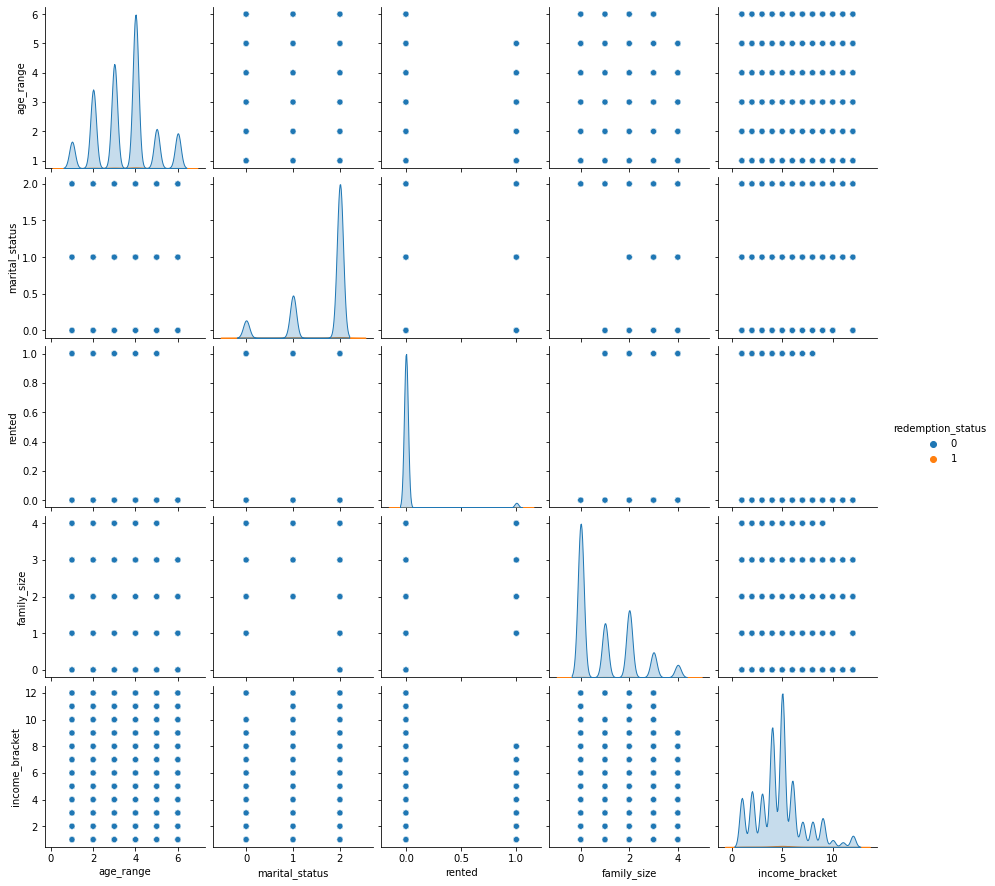

In [291]:
sns.pairplot(df, hue = 'redemption_status')


In [292]:
df_redeem = df.loc[df['redemption_status'] == 1]

In [293]:
df_not_redeem = df.loc[df['redemption_status'] == 0]

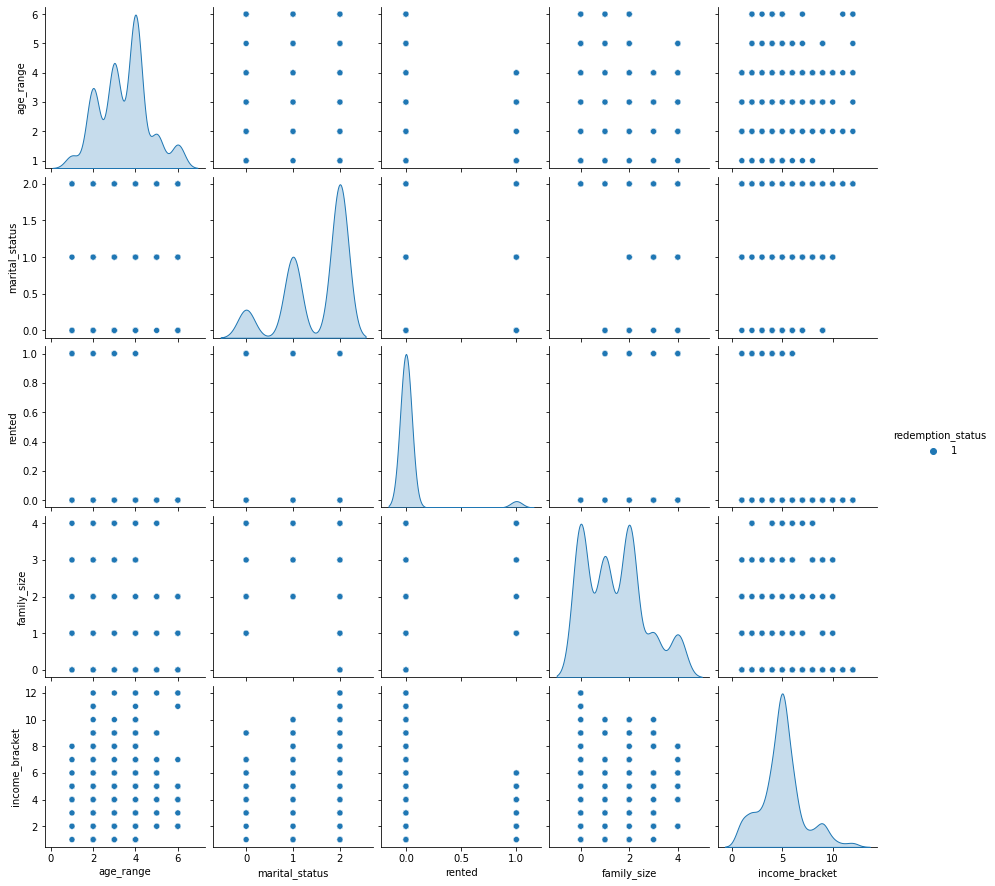

In [294]:
sns.pairplot(df_redeem, hue = 'redemption_status')


In [295]:
df_redeem.describe()


redemption_status   age_range  marital_status      rented  family_size  \
count              729.0  729.000000      729.000000  729.000000   729.000000   
mean                 1.0    3.458162        1.477366    0.039781     1.418381   
std                  0.0    1.154883        0.681261    0.195577     1.232233   
min                  1.0    1.000000        0.000000    0.000000     0.000000   
25%                  1.0    3.000000        1.000000    0.000000     0.000000   
50%                  1.0    4.000000        2.000000    0.000000     1.000000   
75%                  1.0    4.000000        2.000000    0.000000     2.000000   
max                  1.0    6.000000        2.000000    1.000000     4.000000   

       income_bracket  
count      729.000000  
mean         4.968450  
std          2.103854  
min          1.000000  
25%          4.000000  
50%          5.000000  
75%          6.000000  
max         12.000000

In [296]:
df_not_redeem.describe()

redemption_status     age_range  marital_status        rented  \
count            77640.0  77640.000000    77640.000000  77640.000000   
mean                 0.0      3.469178        1.638782      0.029547   
std                  0.0      1.276163        0.627436      0.169334   
min                  0.0      1.000000        0.000000      0.000000   
25%                  0.0      3.000000        1.000000      0.000000   
50%                  0.0      4.000000        2.000000      0.000000   
75%                  0.0      4.000000        2.000000      0.000000   
max                  0.0      6.000000        2.000000      1.000000   

        family_size  income_bracket  
count  77640.000000    77640.000000  
mean       1.000914        4.767092  
std        1.176351        2.356546  
min        0.000000        1.000000  
25%        0.000000        3.000000  
50%        1.000000        5.000000  
75%        2.000000        6.000000  
max        4.000000       12.000000

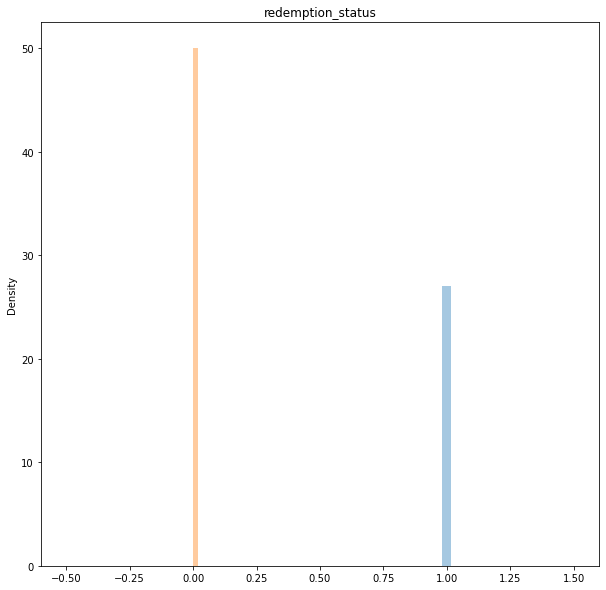

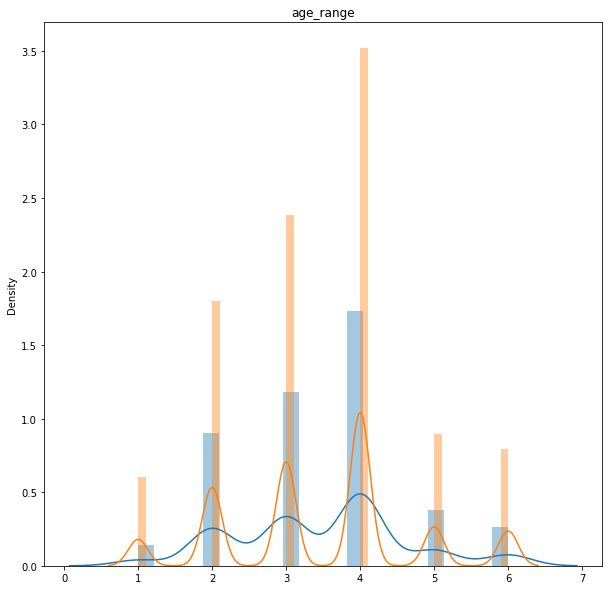

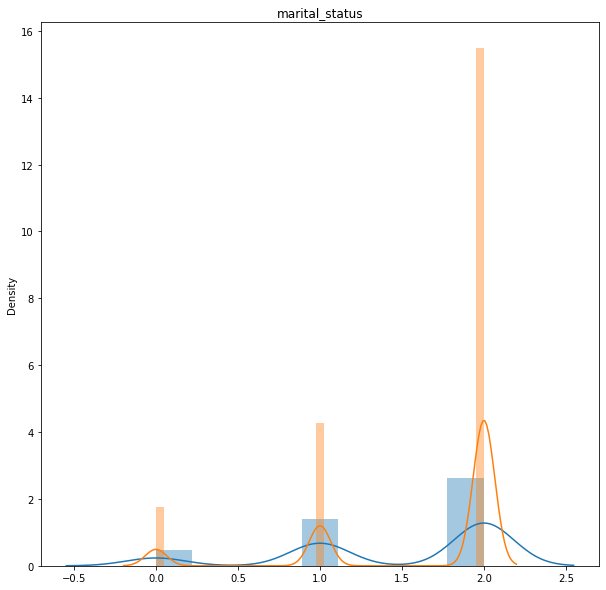

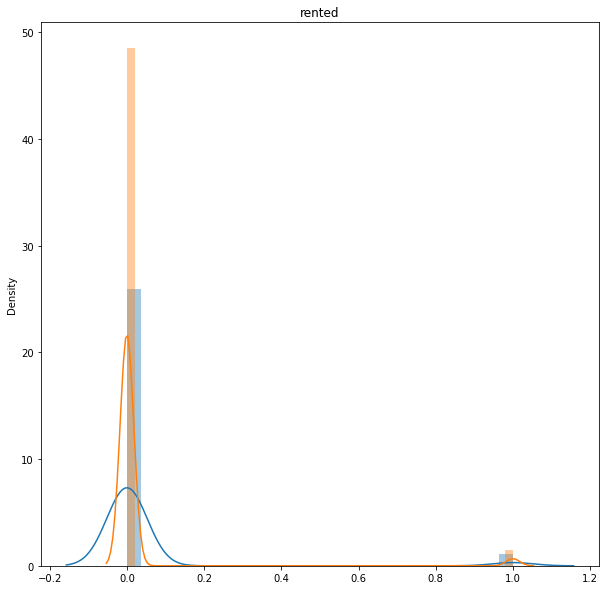

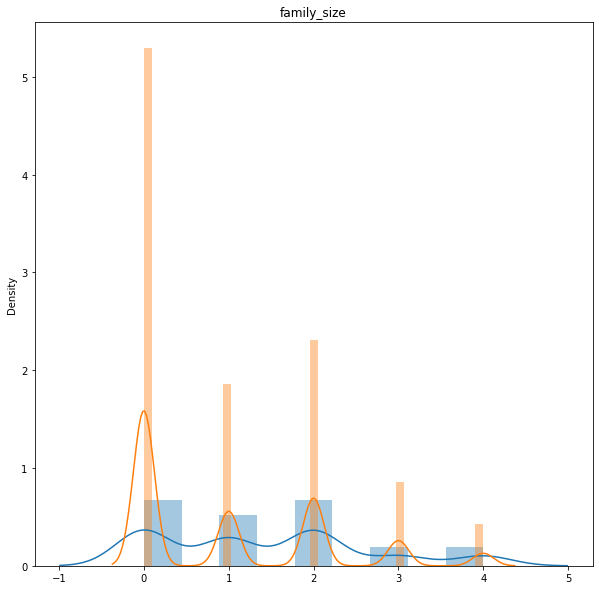

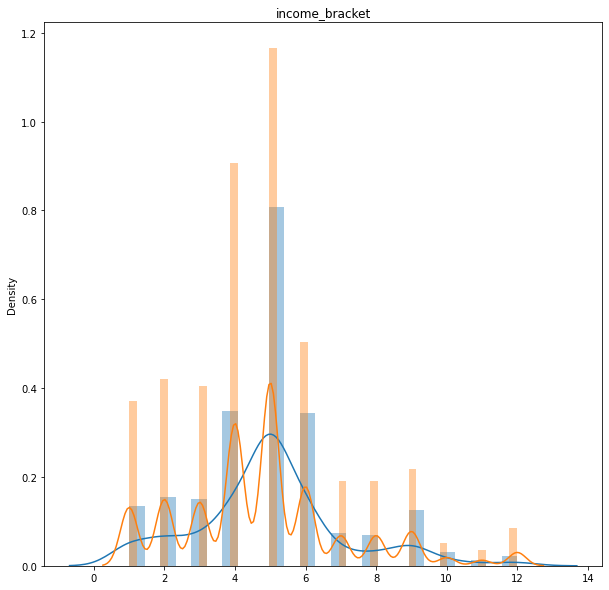

In [297]:
df_columns = df.columns
for i in df_columns:
    figure, ax= plt.subplots(figsize = (10,10))
    sns.distplot(df_redeem, x = df_redeem[i])
    sns.distplot(df_not_redeem, x = df_not_redeem[i])
    plt.title(i)

<b> AGE_RANGE </b>
<br> 18-25 is 1
<br> 26-35 is 2
<br> 36-45 id 3
<br> 46-55 is 4
<br> 56-70 is 5
<br> 70+ os 6


<AxesSubplot:xlabel='income_bracket', ylabel='age_range'>

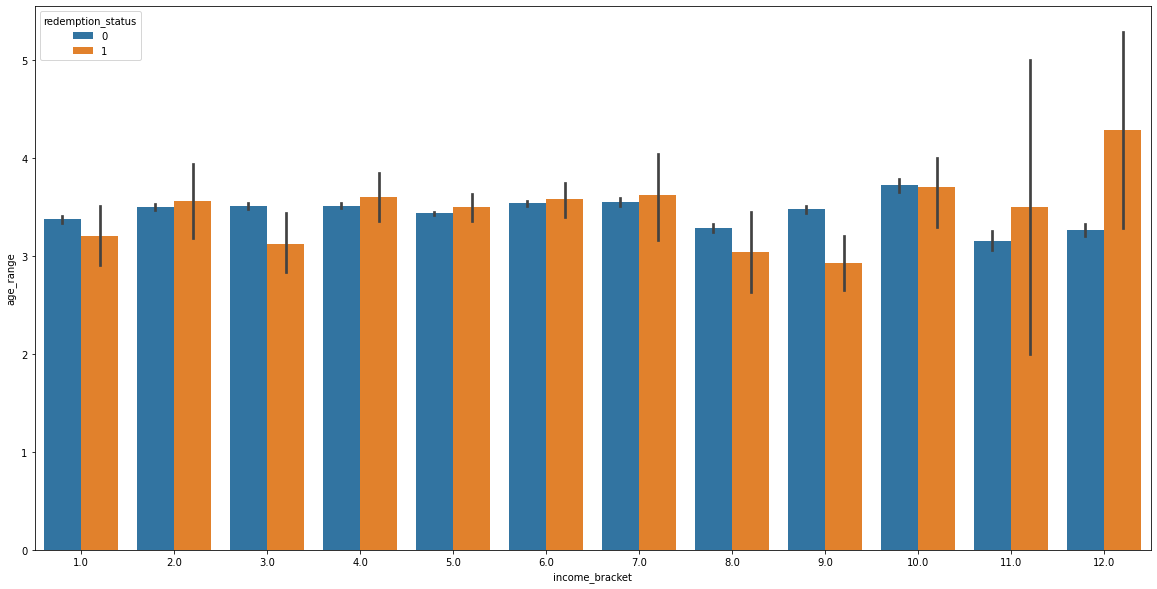

In [305]:
figure, ax= plt.subplots(figsize = (20,10))
sns.barplot( x = 'income_bracket', y ='age_range' , hue = 'redemption_status',
                palette="tab10",  data = df)

In income bracket 12 older people are more likely to use coupon 

<AxesSubplot:xlabel='age_range', ylabel='income_bracket'>

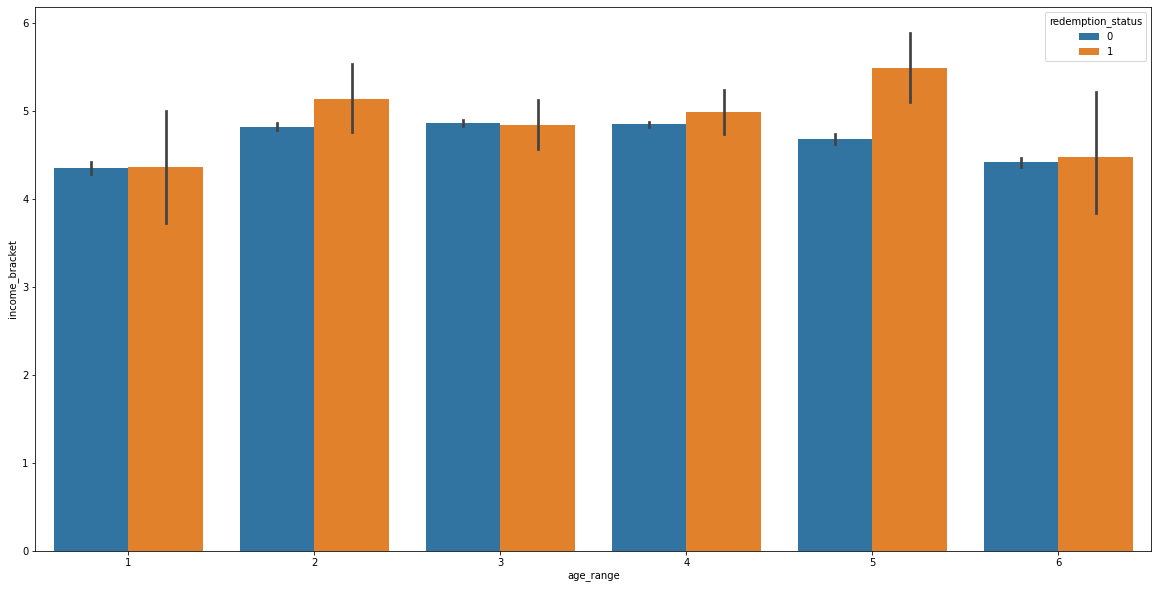

In [299]:
figure, ax= plt.subplots(figsize = (20,10))
sns.barplot( y = 'income_bracket', x ='age_range' , hue = 'redemption_status',
                palette="tab10",  data = df)

In [300]:
df['income_bracket'].value_counts(ascending=False)#(unique)

5.0     20165
4.0     15590
6.0      8701
2.0      7250
3.0      6950
1.0      6379
9.0      3772
8.0      3300
7.0      3292
12.0     1458
10.0      901
11.0      611
Name: income_bracket, dtype: int64

In [301]:
df.columns

Index(['redemption_status', 'age_range', 'marital_status', 'rented',
       'family_size', 'income_bracket'],
      dtype='object')

# Prediction Modeling

In [109]:
df.columns

Index(['redemption_status', 'age_range', 'marital_status', 'rented',
       'family_size', 'income_bracket'],
      dtype='object')

### Changing Categorical Variables to Dummies

In [110]:
marital_status_dummies = pd.get_dummies(df['marital_status'], 
                                prefix = 'marital_status', drop_first = True)
rented_dummies = pd.get_dummies(df['rented'], prefix = 'rented', 
                                drop_first = True)

In [111]:
df_dummies=pd.concat([df.redemption_status, df['age_range'],  
                      marital_status_dummies, rented_dummies, 
                      df['family_size'], df['income_bracket']], axis = 1)

## Decision Tree

### Decision Tree - Base

In [112]:
#Split data 
y = df_dummies['redemption_status']
X = df_dummies.drop('redemption_status', axis = 1)
 
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size = .75, 
                                            test_size=.25, random_state=10)

In [113]:
dt_base = DecisionTreeClassifier(criterion='gini', max_depth = 10, 
                                 class_weight = 'balanced', random_state = 10)
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=10)

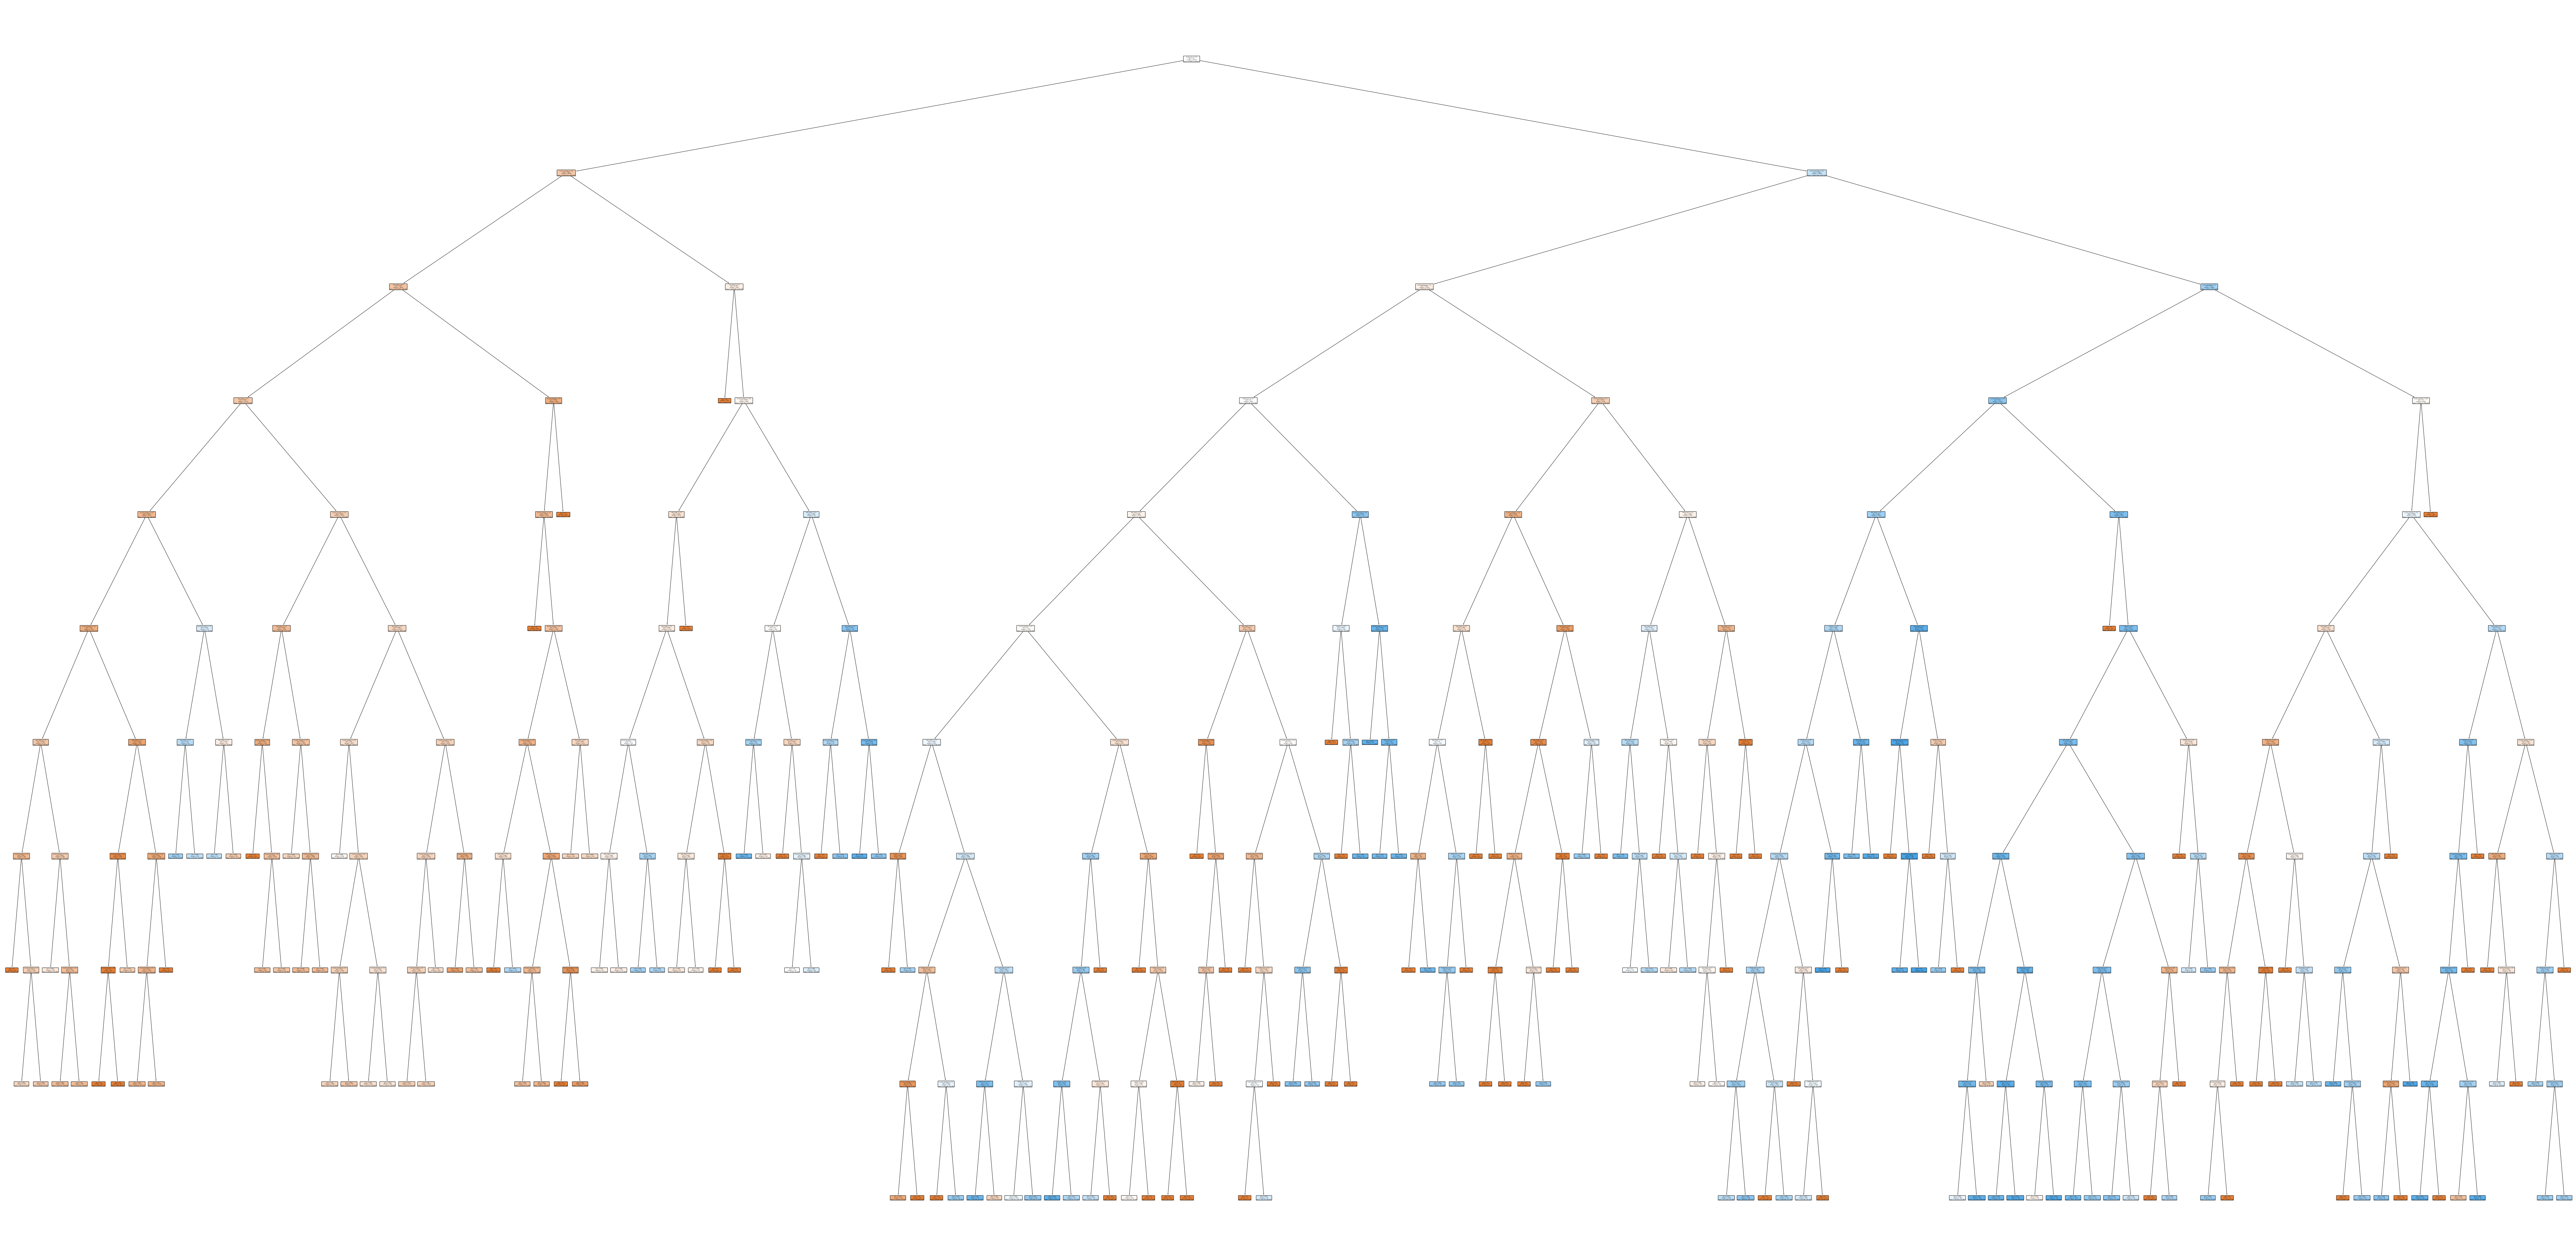

In [114]:
plt.figure(figsize=(150, 75))
plot_tree(dt_base, filled=True, rounded= True, feature_names=X_train.columns);

In [115]:
dt_base.feature_importances_

array([0.23474387, 0.0246542 , 0.09028217, 0.03052314, 0.30119195,
       0.31860467])

In [261]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,10))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values, 
               horizontalalignment='right', fontsize=15)
    plt.xticks(fontsize=15)
    plt.xlabel('Feature Importance', fontsize=18)
    plt.ylabel('Feature', fontsize=18)
    

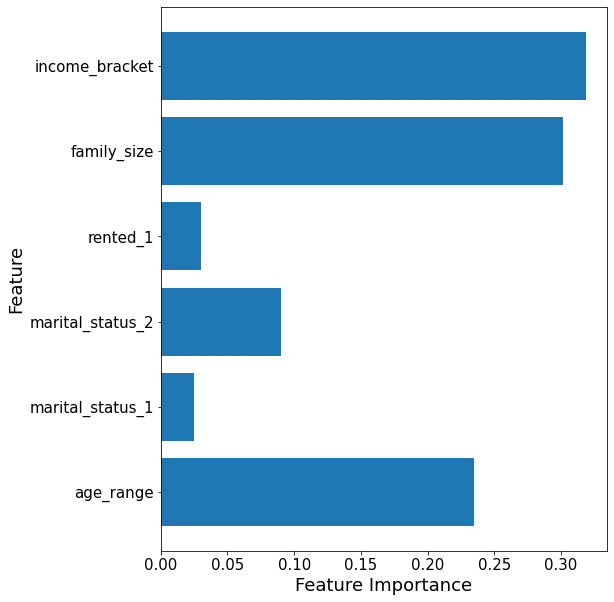

In [302]:
plot_feature_importances(dt_base)

The most important factor for determining weather or not some will use a coupon, in order, are income_bracket, family_size, age_range. 

In [118]:
# Test set predictions
pred = dt_base.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[13572  5833]
 [   84   104]]
              precision    recall  f1-score   support

           0       0.99      0.70      0.82     19405
           1       0.02      0.55      0.03       188

    accuracy                           0.70     19593
   macro avg       0.51      0.63      0.43     19593
weighted avg       0.98      0.70      0.81     19593



In [119]:
dt_cv_score1 = cross_val_score(dt_base, X_train, y_train, cv=10, 
                               scoring= 'roc_auc')
mean_dt_cv_score1 = np.mean(dt_cv_score1)

dt_cv_score2 = cross_val_score(dt_base, X_train, y_train, cv=10, 
                               scoring= 'f1')
mean_dt_cv_score2 = np.mean(dt_cv_score2)

dt_cv_score3 = cross_val_score(dt_base, X_train, y_train, cv=10, 
                               scoring= 'recall')
mean_dt_cv_score3 = np.mean(dt_cv_score3)

dt_cv_score4 = cross_val_score(dt_base, X_train, y_train, cv=10)
mean_dt_cv_score4 = np.mean(dt_cv_score4)

print(f"Mean Cross Validation Score: {mean_dt_cv_score4 : .2%}")
print(f"Mean Cross Validation Score(roc_auc): {mean_dt_cv_score1 : .2%}")
print(f"Mean Cross Validation Score(f1): {mean_dt_cv_score2 : .2%}")
print(f"Mean Cross Validation Score(recall): {mean_dt_cv_score3 : .2%}")

Mean Cross Validation Score:  71.43%
Mean Cross Validation Score(roc_auc):  69.36%
Mean Cross Validation Score(f1):  3.64%
Mean Cross Validation Score(recall):  58.42%


### Decision Tree - GridSearch

In [120]:
r=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [121]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                  15, 16, 17, 18, 19, 20],
    'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                          13, 14, 15, 16, 17, 18, 19, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 
                         13, 14, 15, 16, 17, 18, 19, 20], 
    'class_weight': ['balanced']
}

In [122]:
num_decision_trees = 3 * 2 * 4 * 2 * 2 *1
print(f"Grid Search will have to search through \
{num_decision_trees} different permutations.")


Grid Search will have to search through 96 different permutations.


In [123]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_base, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=10, random_state=10),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20]},
             return_train_score=True)

In [124]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: nan%
Mean Test Score: 74.62%
Best Parameter Combination Found During Grid Search:


{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 13,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [125]:
dt_grid_search = DecisionTreeClassifier(
 class_weight= 'balanced',
 criterion= 'entropy',
 max_depth= 13,
 min_samples_leaf = 10,
 min_samples_split = 2)
dt_grid_search.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=13, min_samples_leaf=10)

In [126]:
# Test set predictions
pred = dt_grid_search.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[14521  4884]
 [   89    99]]
              precision    recall  f1-score   support

           0       0.99      0.75      0.85     19405
           1       0.02      0.53      0.04       188

    accuracy                           0.75     19593
   macro avg       0.51      0.64      0.45     19593
weighted avg       0.98      0.75      0.85     19593



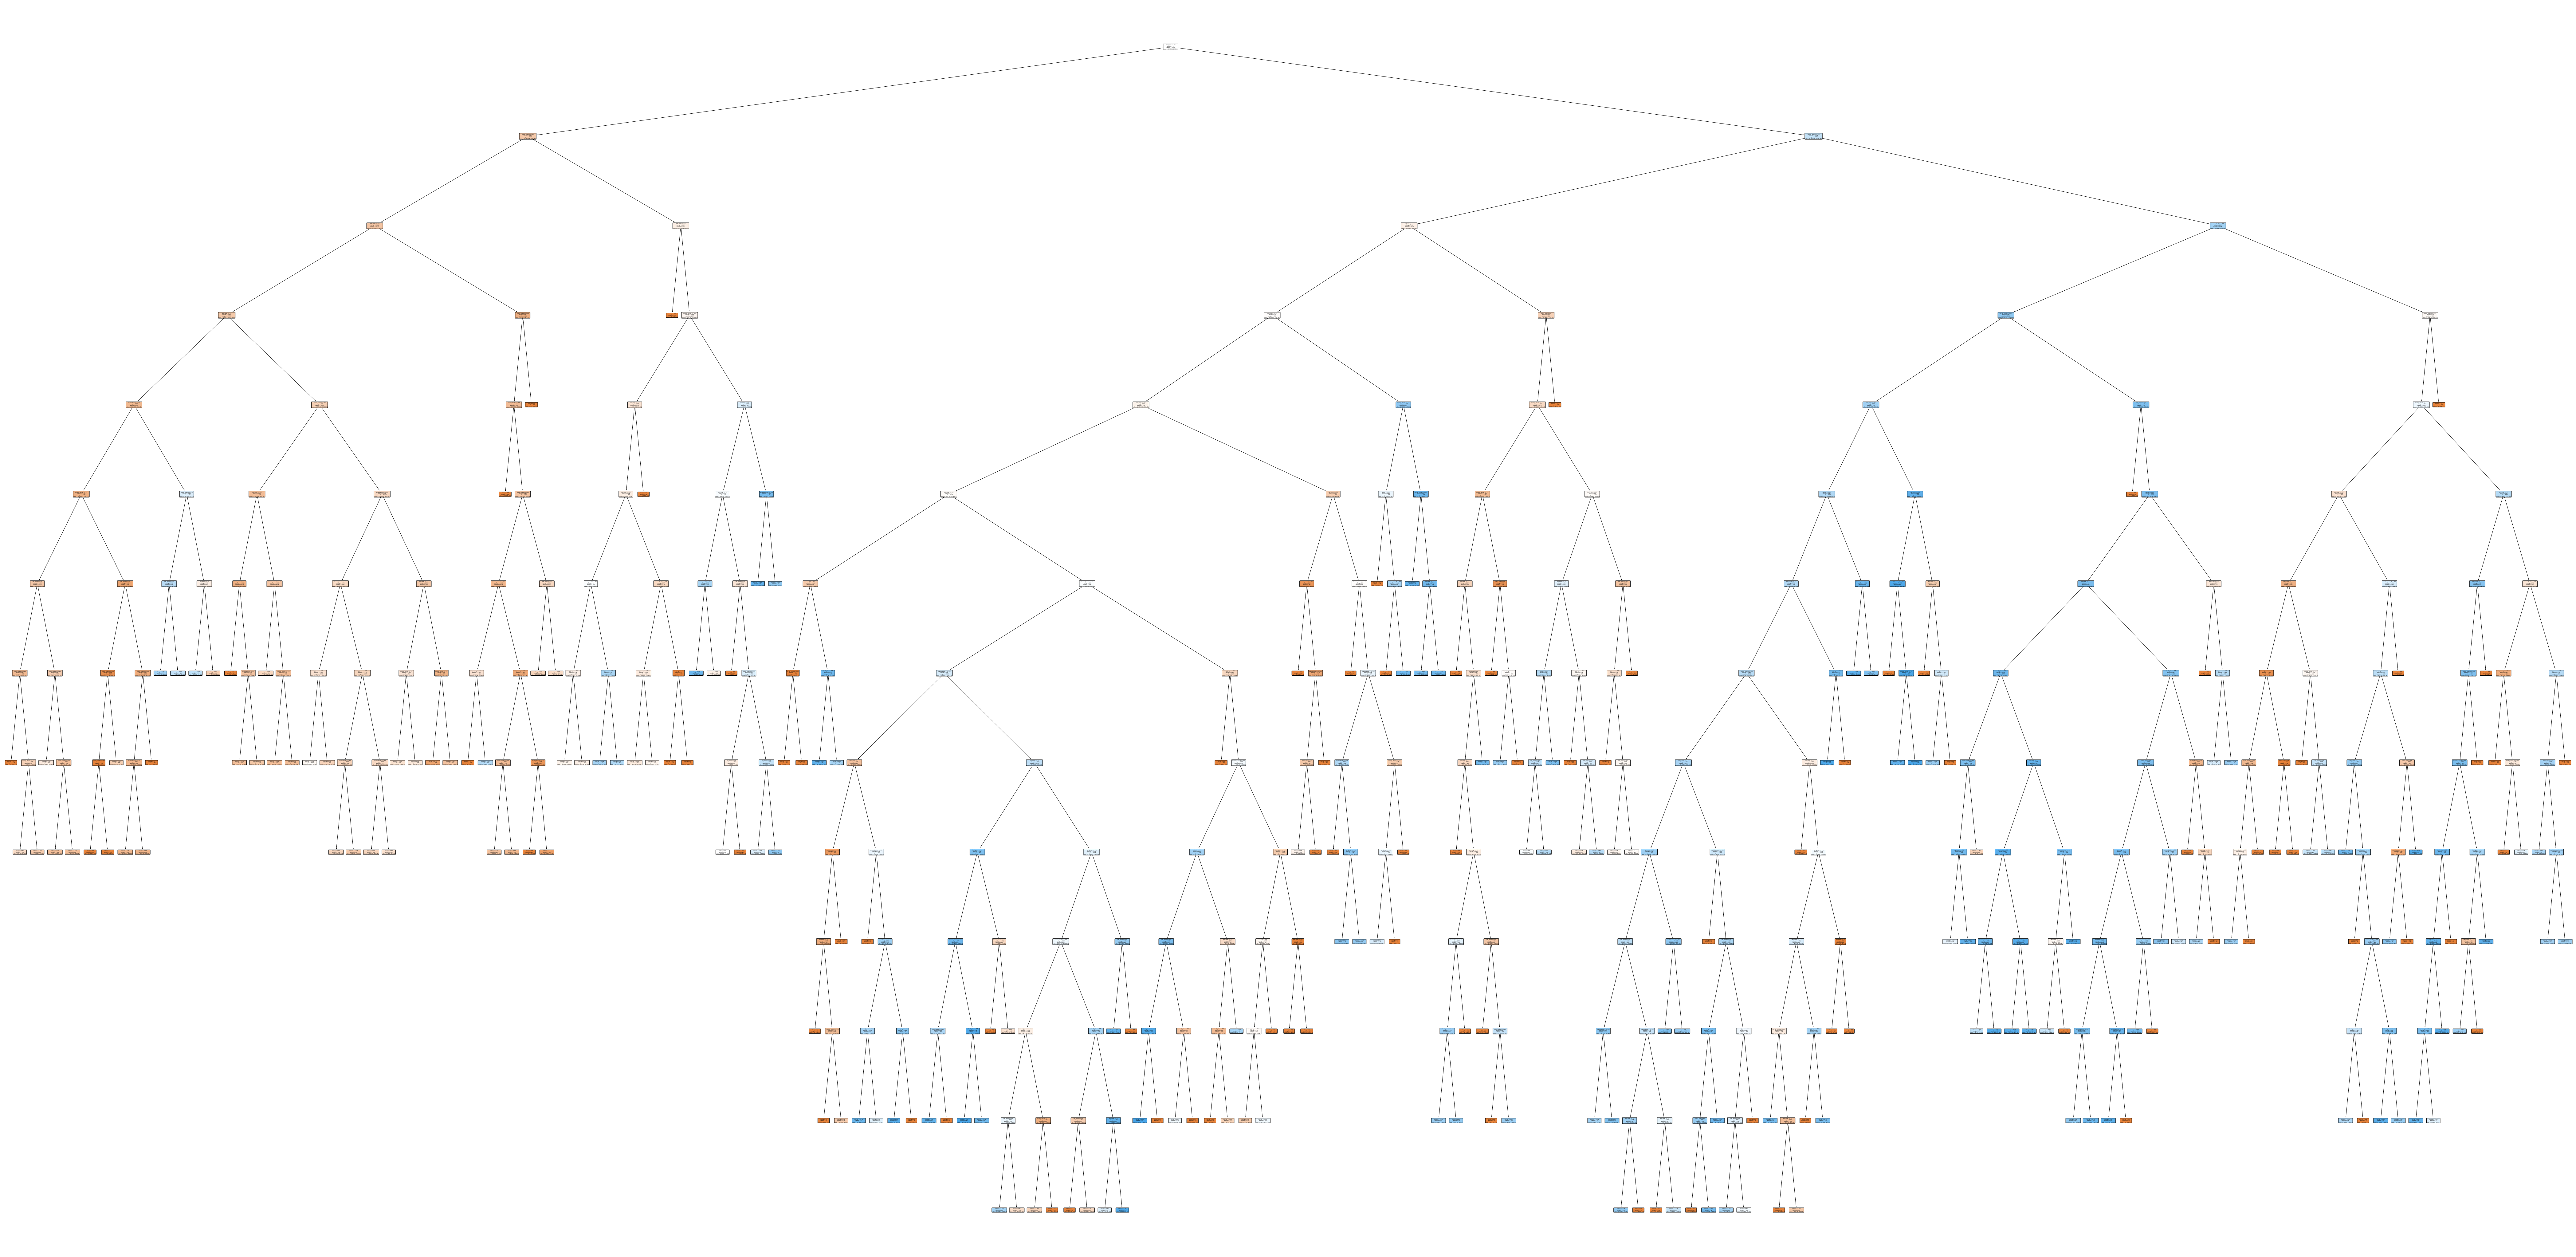

In [127]:
plt.figure(figsize=(150, 75))
plot_tree(dt_grid_search, filled=True, rounded= True, feature_names=X_train.columns);

In [128]:
dt_grid_search.feature_importances_

array([0.26379537, 0.0253312 , 0.05749168, 0.04574931, 0.27555464,
       0.3320778 ])

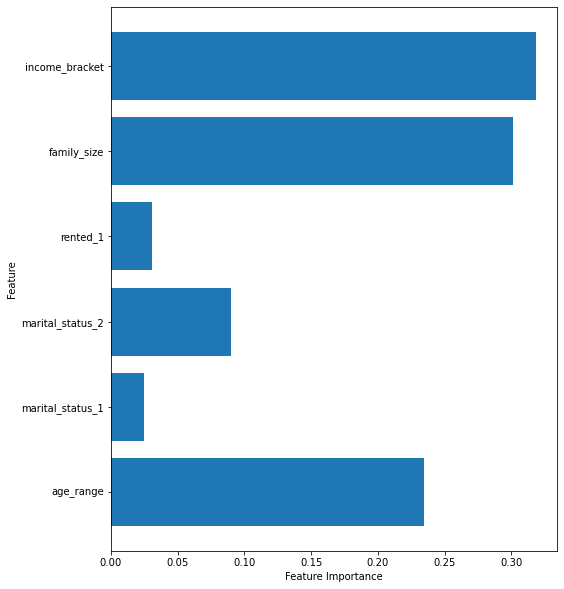

In [129]:
plot_feature_importances(dt_base)

The most important factor for determining weather or not some will use a coupon, in order, are income_bracket, family_size, age_range. 

In [130]:
dt_cv_score11 = cross_val_score(dt_grid_search, X_train, y_train, 
                                cv=10, scoring= 'roc_auc')
mean_dt_cv_score11 = np.mean(dt_cv_score11)

dt_cv_score22 = cross_val_score(dt_grid_search, X_train, y_train, 
                                cv=10, scoring= 'f1')
mean_dt_cv_score22 = np.mean(dt_cv_score22)

dt_cv_score33 = cross_val_score(dt_grid_search, X_train, y_train, 
                                cv=10, scoring= 'recall')
mean_dt_cv_score33 = np.mean(dt_cv_score33)

dt_cv_score44 = cross_val_score(dt_grid_search, X_train, y_train, cv=10)
mean_dt_cv_score44 = np.mean(dt_cv_score44)

print(f"Mean Cross Validation Score: {mean_dt_cv_score44 : .2%}")
print(f"Mean Cross Validation Score(roc_auc): {mean_dt_cv_score11 : .2%}")
print(f"Mean Cross Validation Score(f1): {mean_dt_cv_score22 : .2%}")
print(f"Mean Cross Validation Score(recall): {mean_dt_cv_score33 : .2%}")

Mean Cross Validation Score:  73.79%
Mean Cross Validation Score(roc_auc):  70.67%
Mean Cross Validation Score(f1):  4.06%
Mean Cross Validation Score(recall):  60.09%


In [131]:
A=mean_dt_cv_score11-mean_dt_cv_score1
B=mean_dt_cv_score22-mean_dt_cv_score2
C=mean_dt_cv_score33-mean_dt_cv_score3
D=mean_dt_cv_score44-mean_dt_cv_score4

print(f"Mean Cross Validation Score compared to base model: {D : .2%}")
print(f"Mean Cross Validation Score(roc_auc) compared to \
base model: {A : .2%}")
print(f"Mean Cross Validation Score(f1) compared to base model: {B : .2%}")
print(f"Mean Cross Validation Score(recall) compared to\
base model: {C : .2%}")

Mean Cross Validation Score compared to base model:  2.36%
Mean Cross Validation Score(roc_auc) compared to base model:  1.31%
Mean Cross Validation Score(f1) compared to base model:  0.42%
Mean Cross Validation Score(recall) compared to base model:  1.67%


### Decision Tree - Cross Validation/ Pruning

In [132]:
path = dt_grid_search.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

dts = []

for ccp_alpha in ccp_alphas:
    dt_prun = DecisionTreeClassifier(
         class_weight= 'balanced',
         criterion= 'entropy',
         max_depth= 13,
         min_samples_leaf = 10,
         min_samples_split = 2, ccp_alpha=ccp_alpha)
    dt_prun.fit(X_train, y_train)
    dts.append(dt_prun)

In [133]:
# Test set predictions
pred = dt_prun.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[9610 9795]
 [  69  119]]
              precision    recall  f1-score   support

           0       0.99      0.50      0.66     19405
           1       0.01      0.63      0.02       188

    accuracy                           0.50     19593
   macro avg       0.50      0.56      0.34     19593
weighted avg       0.98      0.50      0.65     19593



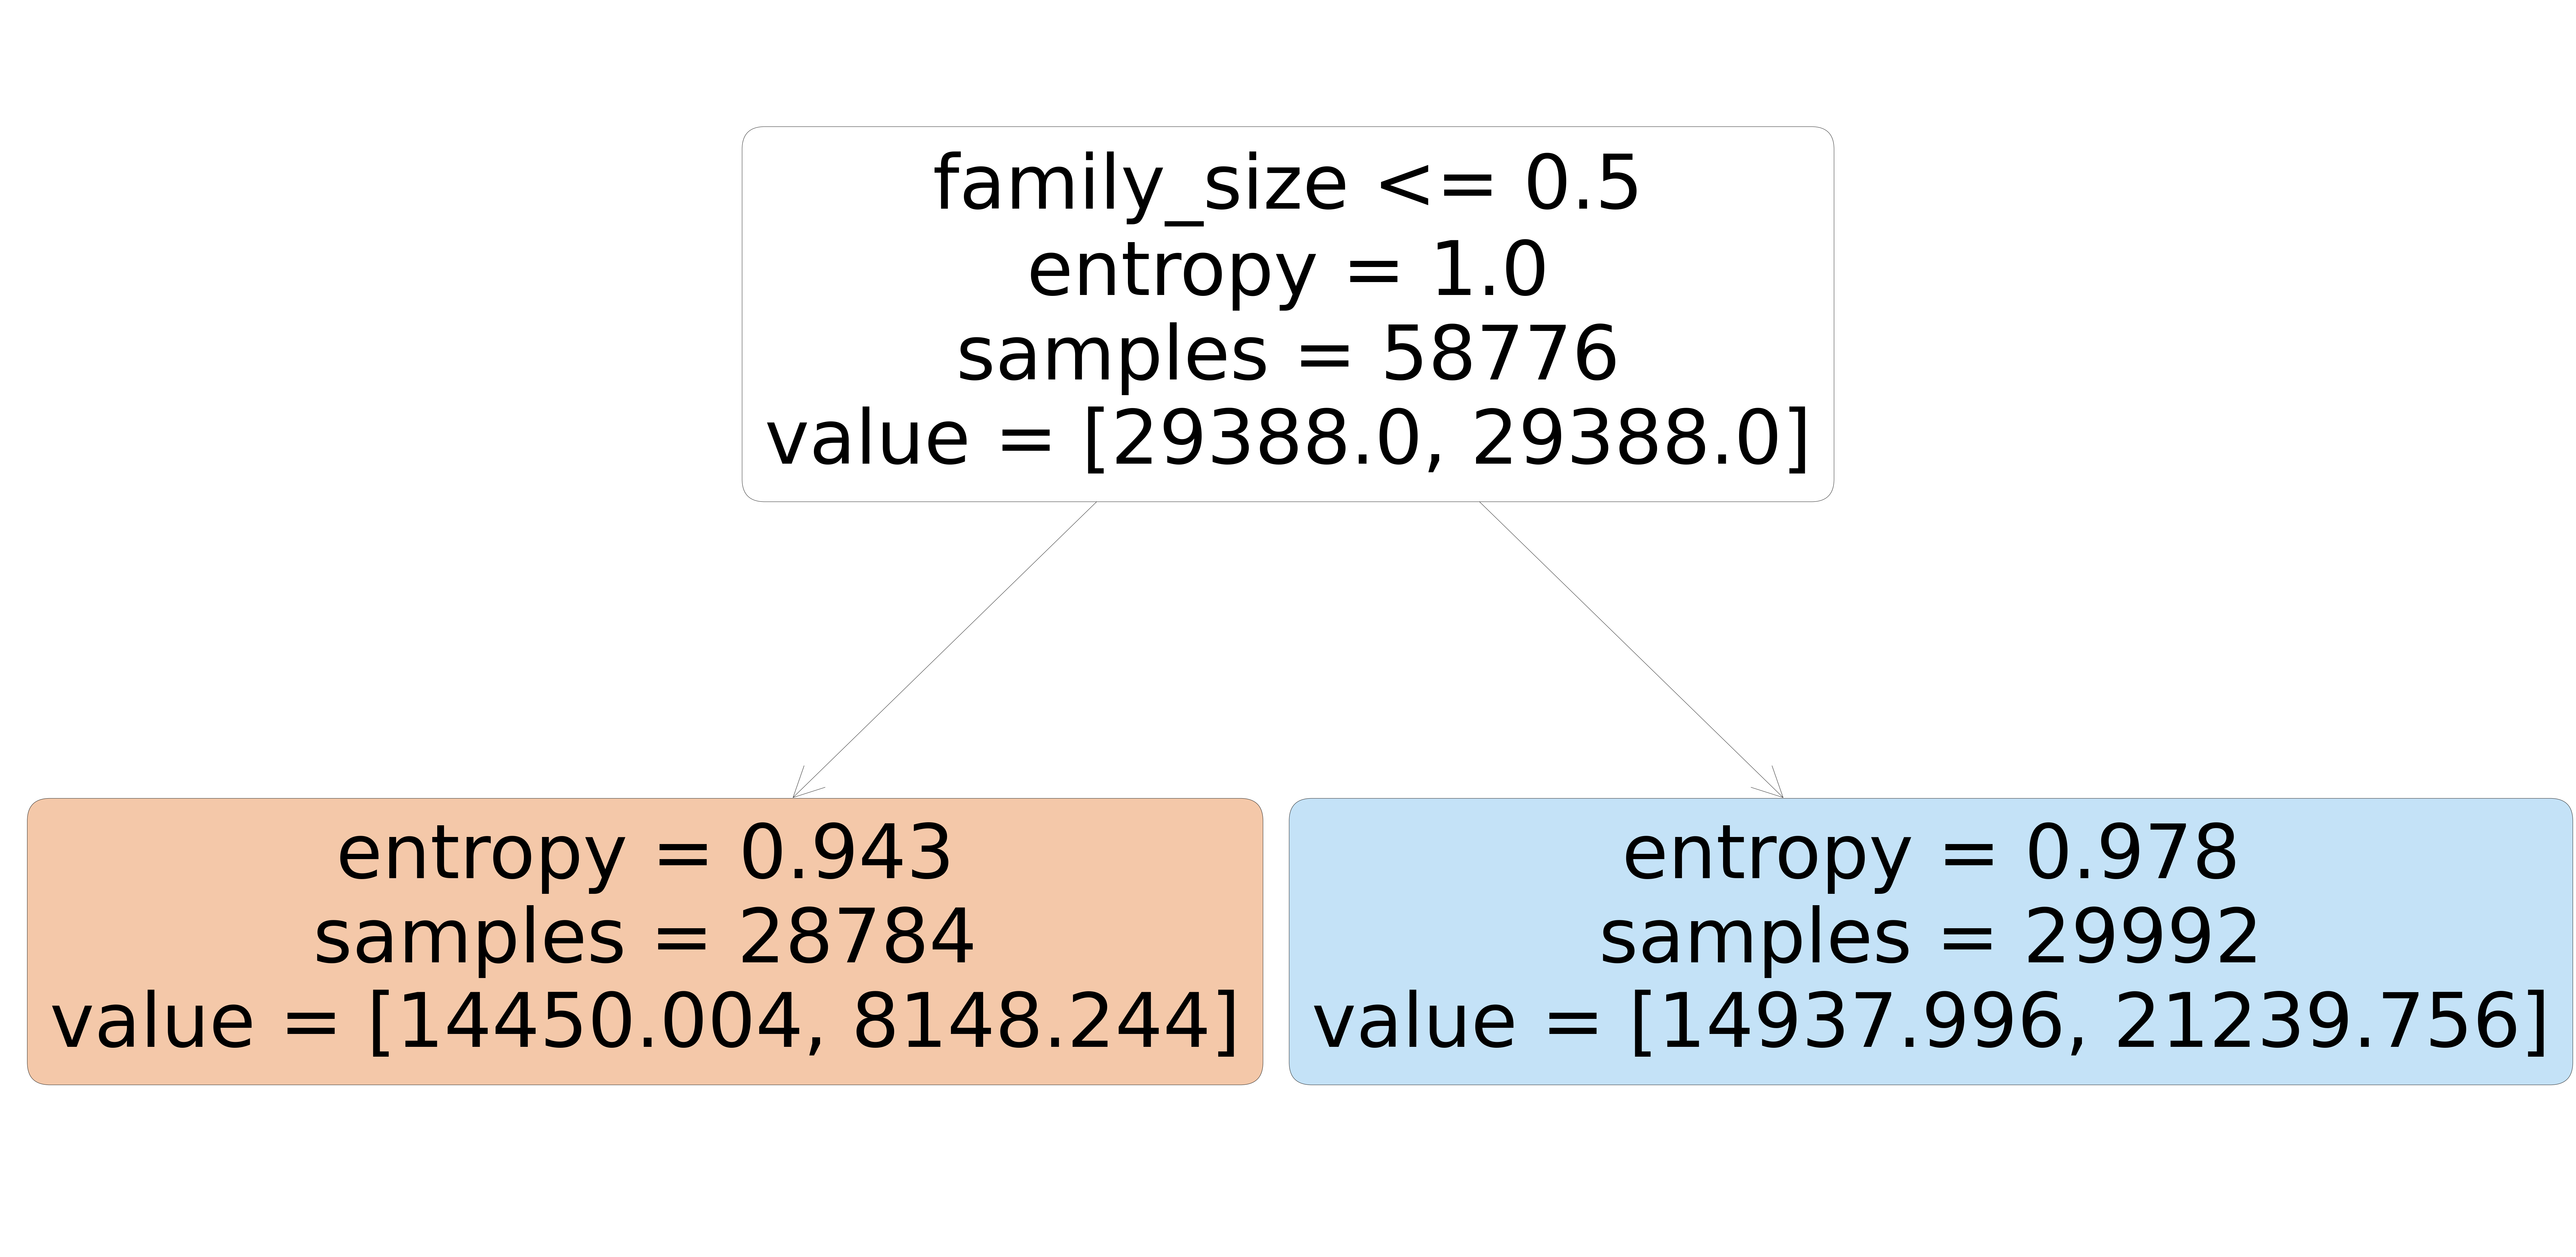

In [134]:
plt.figure(figsize=(150, 75))
plot_tree(dt_prun, filled=True, rounded= True, feature_names=X_train.columns);

In [135]:
dt_prun.feature_importances_

array([0., 0., 0., 0., 1., 0.])

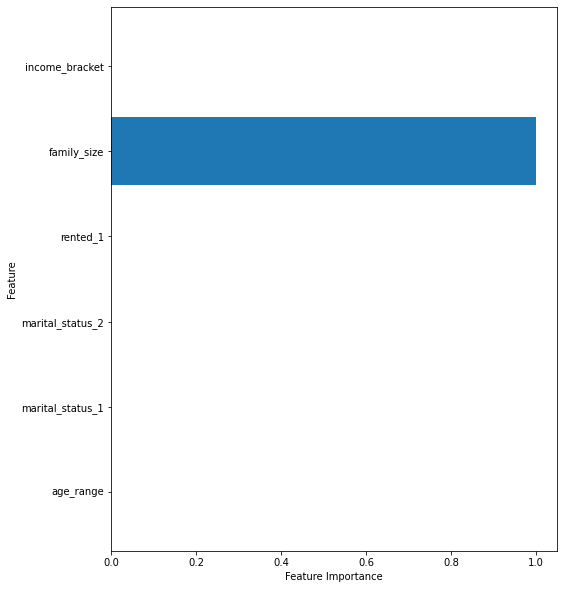

In [136]:
plot_feature_importances(dt_prun)

The most important factor for determining weather or not some will use a coupon, in order, are income_bracket, family_size, age_range. 

In [137]:
dt_cv_score12 = cross_val_score(dt_prun, X_train, y_train, cv=10, 
                                scoring= 'roc_auc')
mean_dt_cv_score12 = np.mean(dt_cv_score12)

dt_cv_score21 = cross_val_score(dt_prun, X_train, y_train, cv=10,
                                scoring= 'f1')
mean_dt_cv_score21 = np.mean(dt_cv_score21)

dt_cv_score34 = cross_val_score(dt_prun, X_train, y_train, cv=10, 
                                scoring= 'recall')
mean_dt_cv_score34 = np.mean(dt_cv_score34)

dt_cv_score43 = cross_val_score(dt_prun, X_train, y_train, cv=10)
mean_dt_cv_score43 = np.mean(dt_cv_score43)

print(f"Mean Cross Validation Score: {mean_dt_cv_score43 : .2%}")
print(f"Mean Cross Validation Score(roc_auc): {mean_dt_cv_score12 : .2%}")
print(f"Mean Cross Validation Score(f1): {mean_dt_cv_score21 : .2%}")
print(f"Mean Cross Validation Score(recall): {mean_dt_cv_score34 : .2%}")

Mean Cross Validation Score:  61.08%
Mean Cross Validation Score(roc_auc):  61.79%
Mean Cross Validation Score(f1):  2.81%
Mean Cross Validation Score(recall):  59.13%


In [138]:
A=mean_dt_cv_score12-mean_dt_cv_score1
B=mean_dt_cv_score21-mean_dt_cv_score2
C=mean_dt_cv_score34-mean_dt_cv_score3
D=mean_dt_cv_score43-mean_dt_cv_score4

print(f"Mean Cross Validation Score compared to base model: {D : .2%}")
print(f"Mean Cross Validation Score(roc_auc) compared to base \
model: {A : .2%}")
print(f"Mean Cross Validation Score(f1) compared to base model: {B : .2%}")
print(f"Mean Cross Validation Score(recall) compared to base \
      model: {C : .2%}")

Mean Cross Validation Score compared to base model: -10.35%
Mean Cross Validation Score(roc_auc) compared to base model: -7.57%
Mean Cross Validation Score(f1) compared to base model: -0.83%
Mean Cross Validation Score(recall) compared to base model:  0.71%


This model perform worse than the base model.

In [239]:
A=mean_dt_cv_score12-mean_dt_cv_score11
B=mean_dt_cv_score21-mean_dt_cv_score22
C=mean_dt_cv_score34-mean_dt_cv_score33
D=mean_dt_cv_score43-mean_dt_cv_score44

print(f"Mean Cross Validation Score compared to previous \
      model: {D : .2%}")
print(f"Mean Cross Validation Score(roc_auc) compared to \
    previous model: {A : .2%}")
print(f"Mean Cross Validation Score(f1) compared to previous \ 
      model: {B : .2%}")
print(f"Mean Cross Validation Score(recall) ompared to \
      previous model: {C : .2%}")

Mean Cross Validation Score compared to previous       model: -12.71%


This model perform worse than the previous model.

## Random Forest

### Random Forest

In [71]:
forest = RandomForestClassifier(
         class_weight= 'balanced',
         criterion= 'entropy',
         max_depth= 13,
         min_samples_leaf = 10,
         min_samples_split = 2, n_estimators=100)
forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=13, min_samples_leaf=10)

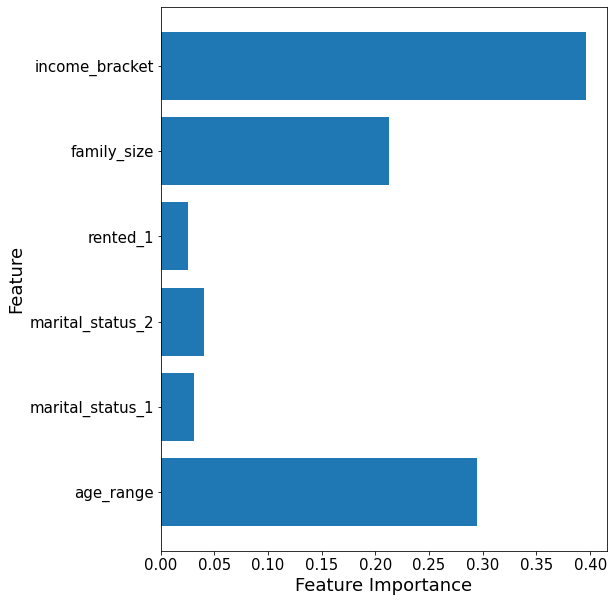

In [303]:
plot_feature_importances(forest)

In [73]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 99.08%


In [74]:
rf_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 
                  16, 17, 18, 19, 20],
    'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 
                          14, 15, 16, 17, 18, 19, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 
                         14, 15, 16, 17, 18, 19, 20], 
    'class_weight': ['balanced', 'smooth']
}

In [75]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 81.88%

Optimal Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 13, 'min_samples_split': 15}


In [76]:
# Test set predictions
pred = rf_grid_search.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[15440  3965]
 [   99    89]]
              precision    recall  f1-score   support

           0       0.99      0.80      0.88     19405
           1       0.02      0.47      0.04       188

    accuracy                           0.79     19593
   macro avg       0.51      0.63      0.46     19593
weighted avg       0.98      0.79      0.88     19593



## Smote

### Smote

Smote will be used to create a more balance data set in order to create a better random forest classification. 

In [142]:
X_smote=X
y_smote=y

### Smote - Decision Tree

In [218]:
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
    # define pipeline
    model = DecisionTreeClassifier()
    over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X_smote, y_smote, scoring='roc_auc', 
                             cv=cv, n_jobs=-1)
    score = np.mean(scores)
    print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.715
> k=2, Mean ROC AUC: 0.712
> k=3, Mean ROC AUC: 0.710
> k=4, Mean ROC AUC: 0.709
> k=5, Mean ROC AUC: 0.707
> k=6, Mean ROC AUC: 0.707
> k=7, Mean ROC AUC: 0.705


After checking to see weather or not changing k values will assit in creating a better ROC AUC.where the k value is 1 Mean ROC AUc produces the best vaule. 

### Smote - Random Forest 

In [174]:
smote1 = SMOTE(sampling_strategy='not majority')
X_train_resampled, y_train_resampled = smote1.fit_sample(X_train, y_train) 
smote = RandomForestClassifier()
over = SMOTE(sampling_strategy=.3, k_neighbors=1)
under = RandomUnderSampler(sampling_strategy=.7)
steps = [('over', over), ('under', under), ('model', smote)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_smote, y_smote, scoring='roc_auc', 
                         cv=10, n_jobs=-1)
score = np.mean(scores)
print('> o=%d, u=%d, Mean ROC AUC: %.3f' % (o, u, score))

> o=0, u=0, Mean ROC AUC: 0.717


In [171]:
smote = RandomForestClassifier()
over = SMOTE(sampling_strategy=.3, k_neighbors=1)
under = RandomUnderSampler(sampling_strategy=.7)
steps = [('over', over), ('under', under), ('model', smote)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_smote, y_smote, scoring='roc_auc', 
                         cv=100, n_jobs=-1)
score = np.mean(scores)
print('> o=%d, u=%d, Mean ROC AUC: %.3f' % (o, u, score))

> o=0, u=0, Mean ROC AUC: 0.720


In [172]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [173]:
# Test set predictions
pred = model.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[19405     0]
 [  188     0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19405
           1       0.00      0.00      0.00       188

    accuracy                           0.99     19593
   macro avg       0.50      0.50      0.50     19593
weighted avg       0.98      0.99      0.99     19593



## Linear Regression 

LogisticRegression(C=1e+20, fit_intercept=False)
AUC for 0.1: 0.5572717878151607
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, fit_intercept=False)
AUC for 0.25: 0.5678119534886271
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, fit_intercept=False)
AUC for 0.33: 0.5636037816531164
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, fit_intercept=False)
AUC for 0.5: 0.5600666366970566
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, fit_intercept=False)
AUC for 0.7: 0.5572745289380342
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, fit_intercept=False)
AUC for even: 0.5561821914729149
---------------------------------------------------------------------------------

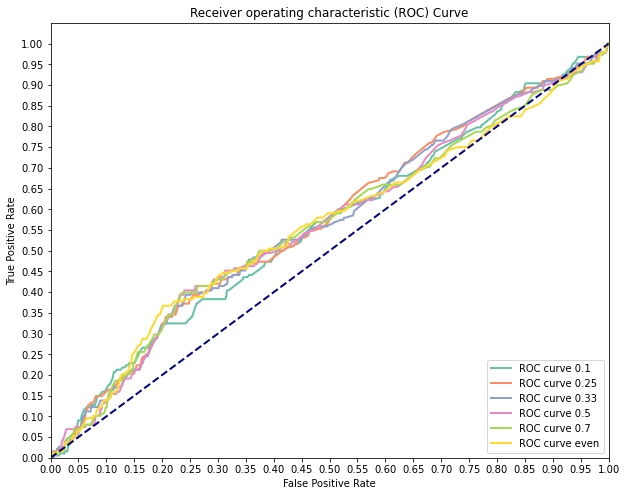

In [69]:
# Now let's compare a few different ratios of minority class to majority class
ratios = [0.1, 0.25, 0.33, 0.5, 0.7, 1]
names = ['0.1', '0.25', '0.33','0.5','0.7','even']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10, 8))

for n, ratio in enumerate(ratios):
    # Fit a model
    smote = SMOTE(sampling_strategy=ratio)
    X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver ='lbfgs')
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log)

    # Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The graph above shows a linear regression model along with smote. Different minority and majority is where tested against the true positive and the false positive rates in hopes of finding the best balance graphicly.  After graphing the data is very close the line with a slope of 1. This shows that there is not a balance that will produce precise/accurate information on either the training or test data. 

## Final Model issues 

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(
    X, y, train_size = .75, test_size=.25, random_state=10)

In [176]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(sampling_strategy='not majority')
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

0    77640
1      729
Name: redemption_status, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    58235
0    58235
Name: redemption_status, dtype: int64


In [227]:
ranfor = RandomForestClassifier(max_depth= 15, min_samples_leaf= 5, 
                                min_samples_split= 10)

In [228]:
ranfor.fit(X_train_resampled, y_train_resampled)
#############

RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=10)

In [229]:
pred11= ranfor.predict(X_test)
###############

In [230]:
# Confusion matrix and classification report
print(confusion_matrix(y_test, pred11))
print(classification_report(y_test, pred11))
###############

[[15690  3715]
 [  108    80]]
              precision    recall  f1-score   support

           0       0.99      0.81      0.89     19405
           1       0.02      0.43      0.04       188

    accuracy                           0.80     19593
   macro avg       0.51      0.62      0.47     19593
weighted avg       0.98      0.80      0.88     19593



In [231]:
predict12=ranfor.predict(X_train_resampled)

The above confusion matrix and classification report does not seem impressive, but it has a increased f1 scores and decrease.  Also the below chart show that even with all this modeling the training set does not do a good job of predicting the data, it is hard to expect that the test data would perform better.

In [ ]:
# Confusion matrix and classification report
print(confusion_matrix(y_train_resampled, predict12))
print(classification_report(y_train_resampled, predict12))

In [233]:
from sklearn.tree import export_graphviz

In [221]:
ranfor.feature_importances_

array([0.20690585, 0.02613524, 0.05161692, 0.02587291, 0.18355116,
       0.50591792])

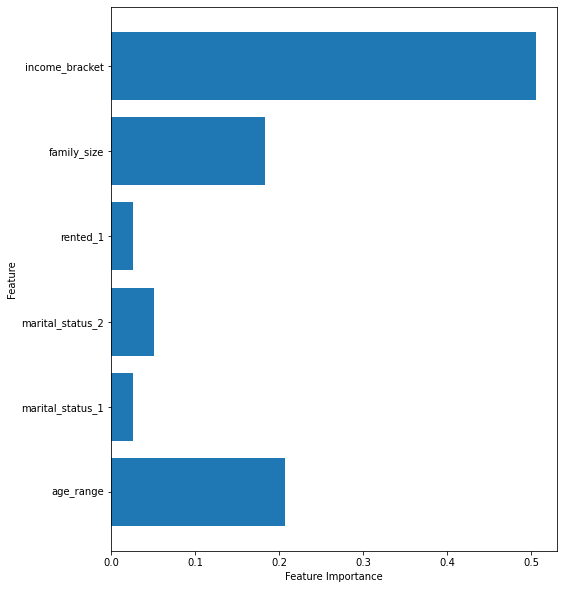

In [222]:
plot_feature_importances(ranfor)

Even though the classifier did not perform we do see that across all the models the same 3 features are classified as  important an in the same order. 